In [2]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [94]:
# load and investigate the data here:

stats = pd.read_csv('tennis_stats.csv')

print(stats.shape)
# print(stats.dtypes)

stats.describe()





(1721, 24)


,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
count,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,...,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1.721000e+03,1721.000000
mean,2013.646717,0.598053,0.680738,0.261673,0.479733,0.466432,97.105171,0.369407,112.003486,102.918071,...,0.173823,0.342208,197.650203,0.715590,0.473155,0.599245,7.876816,9.278908,2.344928e+05,269.610691
std,2.488018,0.054533,0.070422,0.056639,0.066902,0.068447,137.966077,0.162987,119.247651,122.761670,...,0.080880,0.049369,221.208703,0.123287,0.037139,0.057718,10.183716,8.996450,2.530537e+05,277.341947
min,2009.000000,0.360000,0.270000,0.000000,0.060000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.220000,0.250000,0.000000,0.000000,1.080000e+02,3.000000
25%,2012.000000,0.570000,0.650000,0.240000,0.460000,0.440000,7.000000,0.320000,15.000000,9.000000,...,0.130000,0.320000,22.000000,0.670000,0.460000,0.570000,0.000000,2.000000,4.931100e+04,83.000000
50%,2014.000000,0.600000,0.690000,0.270000,0.490000,0.480000,34.000000,0.380000,55.000000,41.000000,...,0.180000,0.350000,86.000000,0.750000,0.480000,0.610000,3.000000,5.000000,1.252120e+05,166.000000
75%,2016.000000,0.630000,0.720000,0.290000,0.520000,0.500000,140.000000,0.430000,201.000000,172.000000,...,0.220000,0.370000,348.000000,0.790000,0.500000,0.630000,13.000000,17.000000,3.500750e+05,333.000000
max,2017.000000,0.880000,0.890000,0.480000,0.920000,0.750000,1185.000000,1.000000,507.000000,573.000000,...,0.560000,0.510000,916.000000,1.000000,0.820000,0.820000,48.000000,36.000000,1.074562e+06,1443.000000


/var/folders/_j/l29yn4z95ll6y9s_ld8p8ml80000gn/T/ipykernel_55231/2348269354.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
/var/folders/_j/l29yn4z95ll6y9s_ld8p8ml80000gn/T/ipykernel_55231/2348269354.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


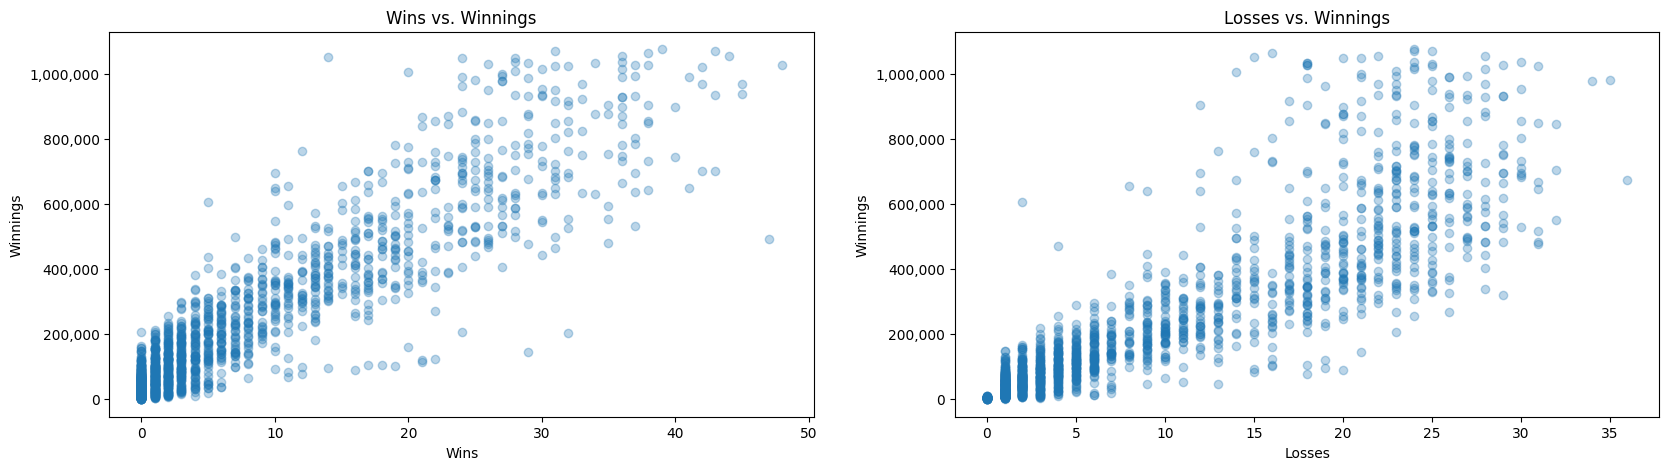

In [100]:
# perform exploratory analysis here:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
plt.scatter(stats.Wins,stats.Winnings,alpha=0.3)

#add commas in y values
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.xlabel("Wins")
plt.ylabel("Winnings")
plt.title("Wins vs. Winnings")

plt.subplot(1,2,2)
plt.scatter(stats.Losses,stats.Winnings,alpha=0.3)

#add commas in y values
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.xlabel("Losses")
plt.ylabel("Winnings")
plt.title("Losses vs. Winnings")
plt.show()
plt.close()


## Analysis
As expected, `Winnings` versus `Wins` appears to have a positive correlation.  The more you win, the more winnings you earn.

An interesting correlation also initially appears between `Winnings` and `Losses`.  This could potentially be related to the more losses you have, the more matches you play, the higher liklihood you win matches and take home winnigs.

/var/folders/_j/l29yn4z95ll6y9s_ld8p8ml80000gn/T/ipykernel_55231/895306041.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_valuesy])
/var/folders/_j/l29yn4z95ll6y9s_ld8p8ml80000gn/T/ipykernel_55231/895306041.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_valuesx])


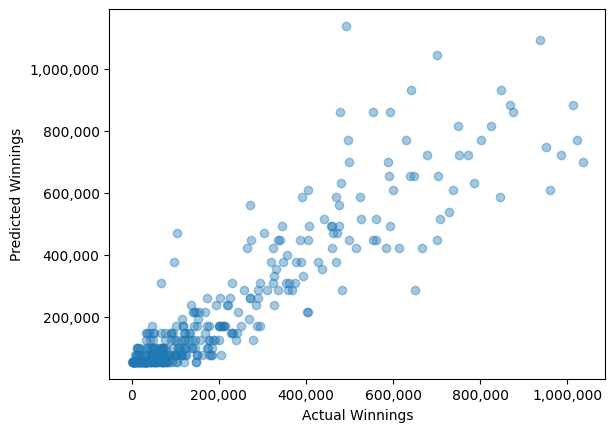

In [110]:
## first single feature linear regressions: Wins versus Winnings
### Create model to predict Winnings based on Wins

#setting feature and outcome
feature = stats[["Wins"]]
outcome = stats[["Winnings"]]


#splitting training and test data
feature_train, feature_test, outcome_train, outcome_test = (train_test_split(feature, outcome, train_size=0.8))

#creating model and training model on training data
model = LinearRegression()
model.fit(feature_train,outcome_train)

#calculating score (coefficient of determination)
model.score(feature_test,outcome_test)
# print(model.score(feature_test,outcome_test))
# score = 0.78

#prediction
prediction = model.predict(feature_test)
plt.scatter(outcome_test,prediction, alpha=0.4)


#add commas in y values
current_valuesy = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_valuesy])

#add commas in x values
current_valuesx = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_valuesx])

plt.xlabel("Actual Winnings")
plt.ylabel("Predicted Winnings")
plt.show()



### Analysis
The calculated score of the model is 0.78 (with a max of 1).  This indicates that the model is acceptable. 

#### Lets create another Linear Regression model

In [ ]:
#setting feature and outcome
feature = stats[["Wins"]]
outcome = stats[["Winnings"]]


#splitting training and test data
feature_train, feature_test, outcome_train, outcome_test = (train_test_split(feature, outcome, train_size=0.8))

#creating model and training model on training data
model = LinearRegression()
model.fit(feature_train,outcome_train)

#calculating score (coefficient of determination)
model.score(feature_test,outcome_test)
# print(model.score(feature_test,outcome_test))
# score = 0.78

#prediction
prediction = model.predict(feature_test)
plt.scatter(outcome_test,prediction, alpha=0.4)


#add commas in y values
current_valuesy = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_valuesy])

#add commas in x values
current_valuesx = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_valuesx])

plt.xlabel("Actual Winnings")
plt.ylabel("Predicted Winnings")
plt.show()


In [70]:
## perform two feature linear regressions here:
#Year and wins

48


In [ ]:
## perform multiple feature linear regressions here:
# 